# Domanda 4

Discutere la compressione di un’immagine ottenuta approssimandola con diadi calcolate mediante la decomposizione in valori singolari, visualizzando le immagini ottenute al variare del numero $p$ di diadi.

Analizzare inoltre i grafici dell’errore relativo e del fattore di compressione $c_p$ al variare di p.

<class 'numpy.ndarray'>
Shape of A:  (512, 512)


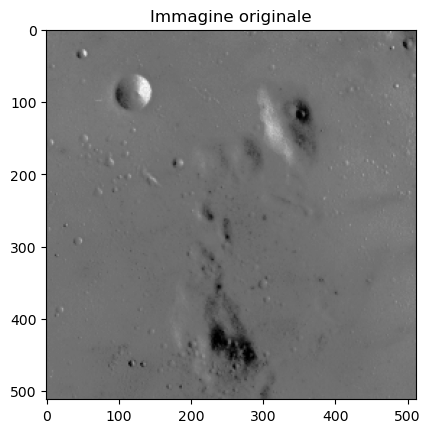

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from skimage import data
from skimage.io import imread

A = data.moon()


print(type(A))
print('Shape of A: ', A.shape)


plt.title("Immagine originale")
plt.imshow(A, cmap='gray')
plt.show()

In [6]:
A_p = np.zeros(A.shape)
p_max = 15

U, s , Vh = scipy.linalg.svd(A)


for i in range(p_max):
    p = i + 1
    ui = U[:, i]
    vi = Vh[i, :]
    A_p = A_p + s[i] * np.outer(ui, vi)

A_p = 
 [[119.89644582 119.89608918 120.44704501 ...  99.58870241 106.95156769
  106.95156769]
 [119.90702594 119.90666948 120.45769025 ...  99.59977846 106.96273521
  106.96273521]
 [119.90704633 119.90670478 120.45769534 ...  99.59978193 106.96277197
  106.96277197]
 ...
 [111.04477285 111.0446944  111.10766341 ... 116.94925973 117.02029328
  117.02029328]
 [111.3492131  111.34914572 111.29504659 ... 117.93386444 117.75771444
  117.75771444]
 [111.3492131  111.34914572 111.29504659 ... 117.93386444 117.75771444
  117.75771444]]




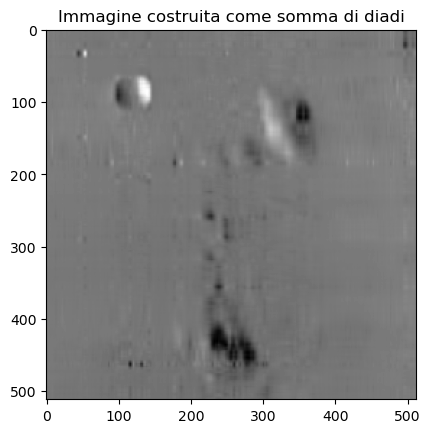

In [7]:
print("A_p = \n", A_p)
print('\n')
plt.imshow(A_p, cmap = 'gray')
plt.title("Immagine costruita come somma di diadi")
plt.show()

L'errore relativo della ricostruzione di A è 0.008633400212591772
Il fattore di compressione è c= 17475.266666666666




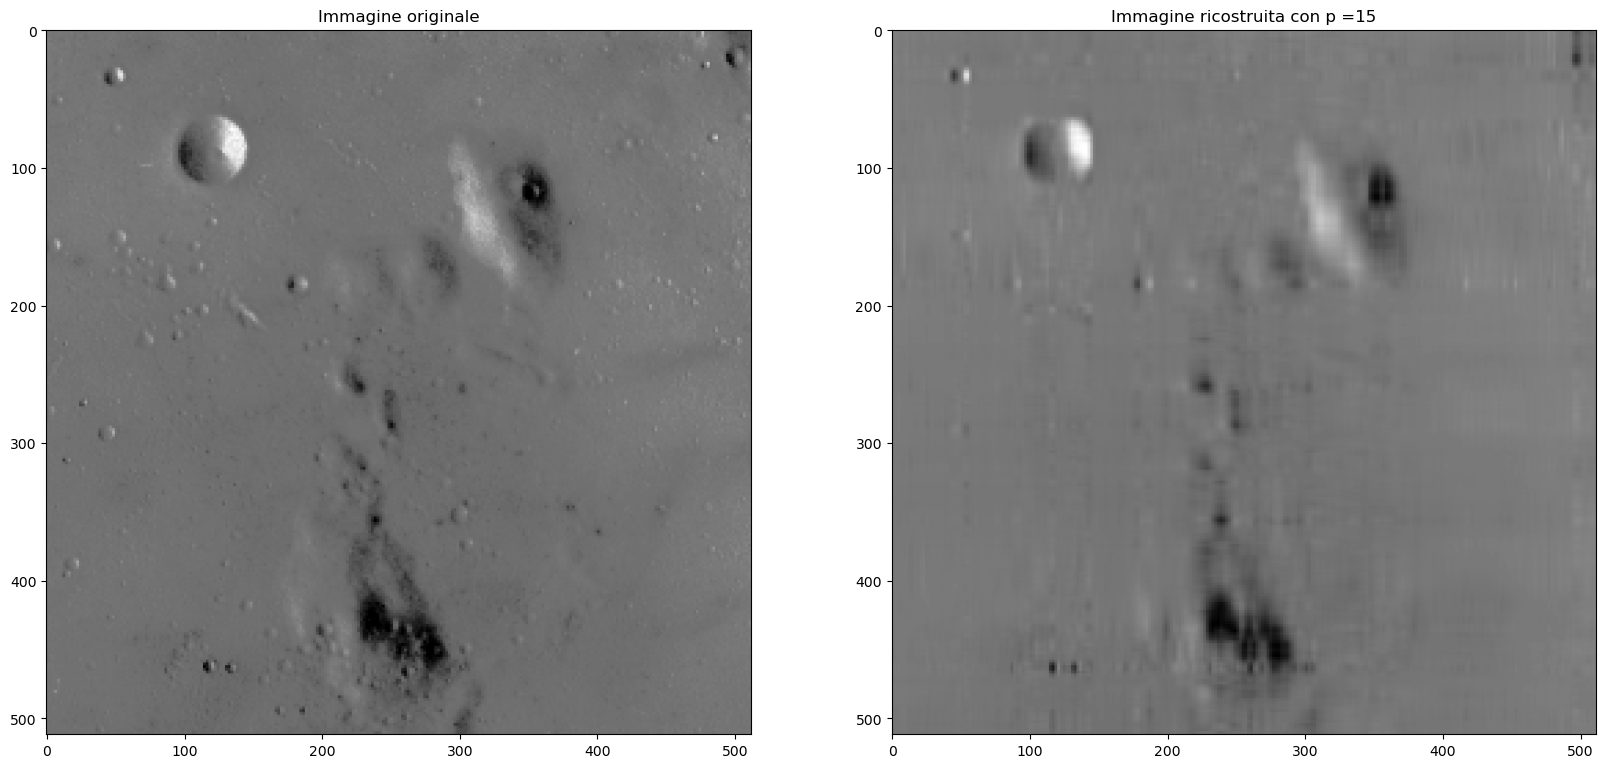

In [8]:
err_rel = np.linalg.norm(A-A_p, 2)/np.linalg.norm(A,2)

m = U.size
n = Vh.size
c = min(m, n) / p_max - 1

print('L\'errore relativo della ricostruzione di A è', err_rel)
print('Il fattore di compressione è c=', c)
print('\n')


plt.figure(figsize=(20, 10))

fig1 = plt.subplot(1, 2, 1)
fig1.imshow(A, cmap='gray')
plt.title('Immagine originale')

fig2 = plt.subplot(1, 2, 2)
fig2.imshow(A_p, cmap='gray')
plt.title('Immagine ricostruita con p =' + str(p_max))

plt.show()

Errore relativo della ricostruzione di A =  0.04214730585861674
Fattore di compressione è c = 131071.0


Errore relativo della ricostruzione di A =  0.028986405183184422
Fattore di compressione è c = 65535.0


Errore relativo della ricostruzione di A =  0.0168066815637244
Fattore di compressione è c = 43689.666666666664


Errore relativo della ricostruzione di A =  0.013069949315228747
Fattore di compressione è c = 32767.0


Errore relativo della ricostruzione di A =  0.012356220996062713
Fattore di compressione è c = 26213.4


Errore relativo della ricostruzione di A =  0.010740834295887167
Fattore di compressione è c = 21844.333333333332


Errore relativo della ricostruzione di A =  0.009020512325315234
Fattore di compressione è c = 18723.571428571428


Errore relativo della ricostruzione di A =  0.008258328951910036
Fattore di compressione è c = 16383.0


Errore relativo della ricostruzione di A =  0.00758854448236135
Fattore di compressione è c = 14562.555555555555




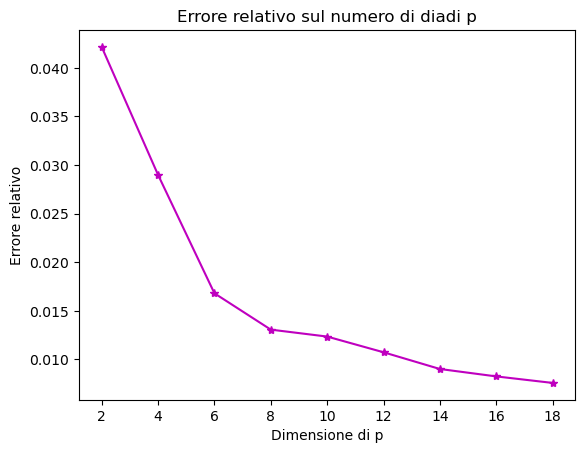

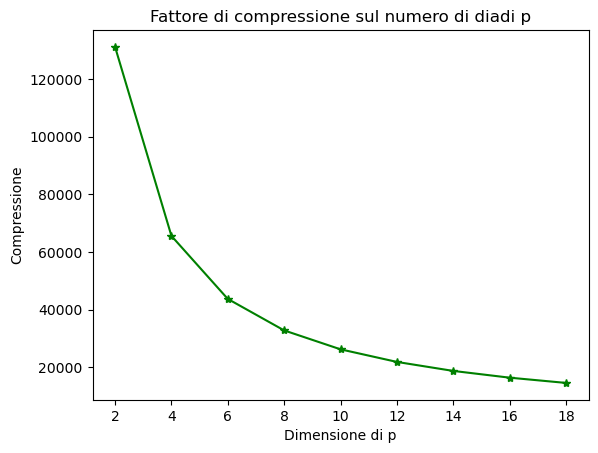

In [9]:
# calcolare e plottare al variare di p

s_v = np.arange(2, 20, 2)
err_rel = np.zeros(np.size(s_v))
c = np.zeros(np.size(s_v))


j = 0
for p_max in s_v:      # P_max indica il numero di diadi che comporranno la matrice.
                        # una diade é una matrice [n, 1] e NON é un vettore.
    
    A_p = np.zeros(A.shape)
    U, s, VT = scipy.linalg.svd(A)

    for i in range(p_max):
      ui = U[:, i]
      vi = VT[i, :]
      A_p = A_p + (np.outer(ui, vi) * s[i])
      
    m = U.size    # Servono per calcolare il fattore di compressione.
    n = VT.size
    c[j] = min(m, n) / p_max - 1 
    
    err_rel[j] = np.linalg.norm(A - A_p, 2) / np.linalg.norm(A, 2)
    
    
    print('Errore relativo della ricostruzione di A = ', err_rel[j])
    print('Fattore di compressione è c =', c[j])
    print('\n')
    j = j + 1
    
plt.plot(s_v, err_rel, '-m*')
plt.title('Errore relativo sul numero di diadi p')
plt.xlabel('Dimensione di p')
plt.ylabel('Errore relativo')
plt.show()

plt.plot(s_v, c, '-g*')  # É normale che il fattore di compressione diminuisca col procedere delle iterazioni:
                    # un valore molto alto significa che l' immagine compressa é molto differente da quella di partenza
plt.title('Fattore di compressione sul numero di diadi p')
plt.xlabel('Dimensione di p')
plt.ylabel('Compressione')
plt.show()